<a href="https://colab.research.google.com/github/aguilarmadeira/ColabTest/blob/main/ORTOOLS_PCV_12_NS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Using cached protobuf-3.19.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
INFO: pip is looking at multiple versions of ortools to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 19.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of ortools to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install ortools==9.2.9972, ortoo

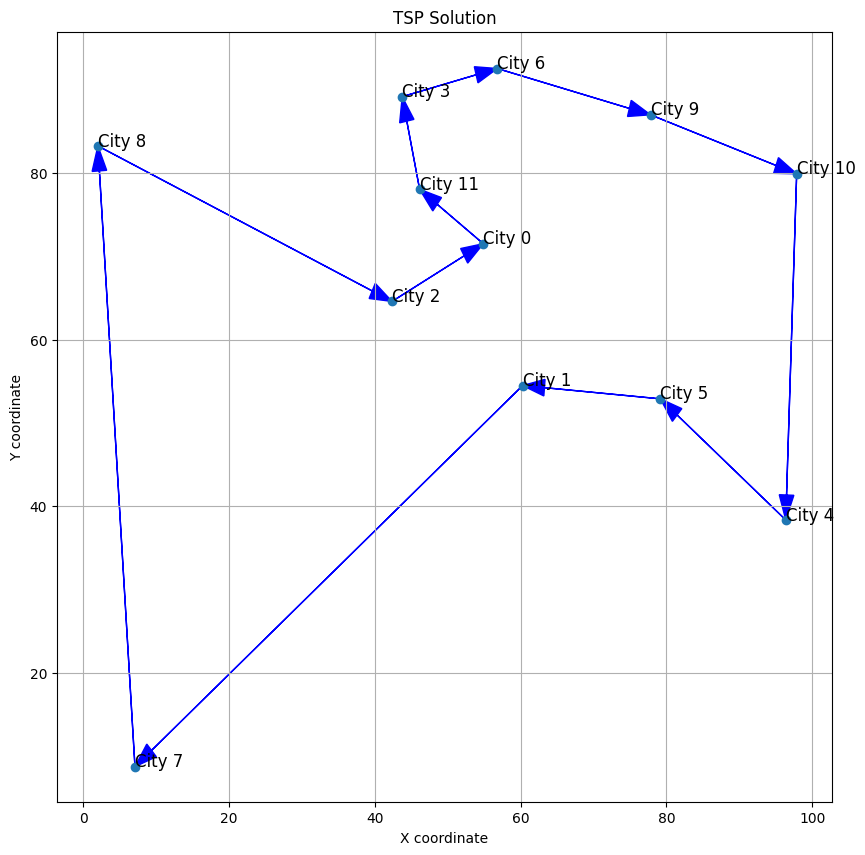

In [1]:

!pip install ortools matplotlib protobuf==3.19.0
import matplotlib.pyplot as plt
import numpy as np
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Generate random coordinates for 12 cities
    np.random.seed(0)
    data['locations'] = np.random.rand(12, 2) * 100
    # Compute distance matrix
    data['distance_matrix'] = np.linalg.norm(data['locations'][:, np.newaxis] - data['locations'], axis=2)
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

def main():
    """Solve the TSP problem and visualize the solution."""
    # Instantiate the data problem
    data = create_data_model()

    # Create the routing index manager
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return int(data['distance_matrix'][from_node][to_node])

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Set the first solution strategy
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console
    if solution:
        print('Objective: {} units'.format(solution.ObjectiveValue()))
        index = routing.Start(0)
        route = []
        while not routing.IsEnd(index):
            route.append(manager.IndexToNode(index))
            index = solution.Value(routing.NextVar(index))
        route.append(manager.IndexToNode(index))
        print(f'Route: {route}')

        # Plot the solution
        plot_solution(data['locations'], route)

def plot_solution(locations, route):
    """Plots the solution."""
    plt.figure(figsize=(10, 10))
    x, y = locations[:, 0], locations[:, 1]
    plt.plot(x, y, 'o')
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi, yi, f'City {i}', fontsize=12)

    for i in range(len(route) - 1):
        start, end = route[i], route[i + 1]
        plt.arrow(x[start], y[start], x[end] - x[start], y[end] - y[start],
                  head_width=2, length_includes_head=True, color='blue')

    plt.title('TSP Solution')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()
